In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('training_data.csv')

# Prepare features (drop 'result' and 'yes_bid') and target
X = df.drop(columns=['result', 'yes_bid'])
y = df['result'].map({'no': 0, 'yes': 1})  # encode labels as 0/1
X = X.fillna(0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# 4. Fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# 5. Predict continuous values
y_pred_cont = lr.predict(X_test)

# 6. Evaluate MSE
mse = mean_squared_error(y_test, y_pred_cont)
print(f"Test MSE: {mse:.4f}")

# 7. Threshold at 0.5 to get binary classifications
y_pred_bin = (y_pred_cont >= 0.5).astype(int)

# 8. Classification metrics
acc = accuracy_score(y_test, y_pred_bin)
print(f"Thresholded Accuracy: {acc:.4f}\n")
print(classification_report(y_test, y_pred_bin, target_names=['no','yes']))

Test MSE: 0.2241
Thresholded Accuracy: 0.6379

              precision    recall  f1-score   support

          no       0.43      0.23      0.30        39
         yes       0.68      0.84      0.76        77

    accuracy                           0.64       116
   macro avg       0.56      0.54      0.53       116
weighted avg       0.60      0.64      0.60       116



In [3]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    solver='lbfgs',      # default solver, suitable for small to medium datasets
    max_iter=1000,       # increase iterations if needed for convergence
    random_state=42
)
clf.fit(X_train, y_train)

# 5. Predict on the test set
y_pred = clf.predict(X_test)

# 6. Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['no', 'yes']))

Test Accuracy: 0.6379

Classification Report:
              precision    recall  f1-score   support

          no       0.43      0.23      0.30        39
         yes       0.68      0.84      0.76        77

    accuracy                           0.64       116
   macro avg       0.56      0.54      0.53       116
weighted avg       0.60      0.64      0.60       116



In [4]:
# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['no', 'yes']))

# (Optional) Inspect feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("\nFeature importances:")
print(importances)

Test Accuracy: 0.6897

Classification Report:
              precision    recall  f1-score   support

          no       0.56      0.38      0.45        39
         yes       0.73      0.84      0.78        77

    accuracy                           0.69       116
   macro avg       0.64      0.61      0.62       116
weighted avg       0.67      0.69      0.67       116


Feature importances:
post_36    0.047567
post_29    0.033166
post_28    0.032549
post_40    0.032152
post_20    0.031091
post_18    0.031033
post_32    0.030970
post_33    0.030466
post_4     0.029150
post_12    0.027765
post_8     0.027673
post_34    0.027633
post_6     0.026755
post_38    0.026102
post_14    0.025794
post_3     0.025437
post_26    0.025202
post_16    0.025107
post_19    0.024839
post_7     0.024732
post_15    0.024286
post_17    0.024241
post_31    0.023993
post_27    0.023728
post_5     0.023603
post_37    0.023087
post_21    0.022698
post_13    0.022667
post_35    0.022646
post_39    0.022361
post_


Epoch 1/50
26/26 - 2s - 63ms/step - accuracy: 0.5966 - loss: 0.6670 - val_accuracy: 0.6304 - val_loss: 0.6938
Epoch 2/50
26/26 - 0s - 8ms/step - accuracy: 0.6860 - loss: 0.5969 - val_accuracy: 0.6304 - val_loss: 0.6838
Epoch 3/50
26/26 - 0s - 7ms/step - accuracy: 0.7222 - loss: 0.5648 - val_accuracy: 0.6739 - val_loss: 0.6668
Epoch 4/50
26/26 - 0s - 8ms/step - accuracy: 0.7488 - loss: 0.5291 - val_accuracy: 0.6739 - val_loss: 0.6678
Epoch 5/50
26/26 - 0s - 7ms/step - accuracy: 0.7850 - loss: 0.4995 - val_accuracy: 0.6739 - val_loss: 0.6666
Epoch 6/50
26/26 - 0s - 6ms/step - accuracy: 0.8092 - loss: 0.4754 - val_accuracy: 0.6739 - val_loss: 0.6655
Epoch 7/50
26/26 - 0s - 7ms/step - accuracy: 0.8237 - loss: 0.4492 - val_accuracy: 0.6739 - val_loss: 0.6658
Epoch 8/50
26/26 - 0s - 7ms/step - accuracy: 0.8309 - loss: 0.4278 - val_accuracy: 0.7174 - val_loss: 0.6618
Epoch 9/50
26/26 - 0s - 7ms/step - accuracy: 0.8309 - loss: 0.4065 - val_accuracy: 0.6957 - val_loss: 0.6648
Epoch 10/50
26/26

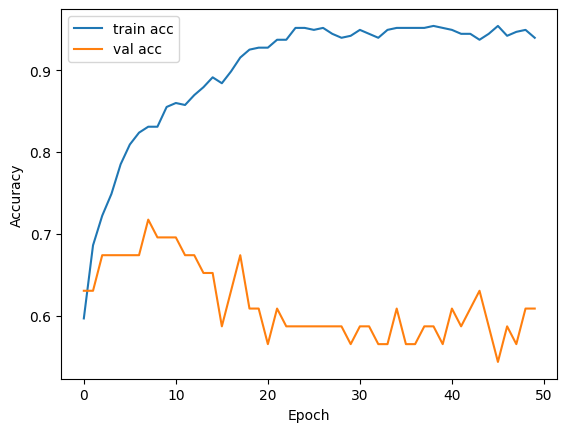

In [5]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

tf.keras.backend.clear_session()

# 2. Remove old Python variable (optional, but safe)
try:
    del model
except NameError:
    pass

# 6. Build the model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 7. Compile
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 8. Train
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=16,
    verbose=2
)

# 9. Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.4f}")

# 10. (Optional) Plot training history
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()